In [ ]:
import pandas as pd
import numpy as np

from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/waterQuality/all4classes.csv')

In [ ]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,body,Subjectivity,Polarity,Analysis,cod
0,0,0,0,predatory white pointers dingos saltwatercrocs...,0.075066,0.075066,Positive,0
1,1,1,1,this january simply note that are still having...,0.000000,0.000000,Neutral,0
2,2,2,2,pronouns hehim height zodiac sign leo smoke he...,0.000000,0.000000,Neutral,0
3,3,3,3,pronouns hehim height zodiac sign sagittarius ...,-0.075000,-0.075000,Negative,0
4,4,4,4,hoses are inchworm water lilies are powderblue...,-0.166667,-0.166667,Negative,0


In [ ]:
# getting labels from pre-processed dataset
label = train_data.iloc[:, -1:].values
print(label)

[[0]
 [0]
 [0]
 ...
 [3]
 [3]
 [3]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split (train_data['body'], label, test_size=0.2, random_state=0)

In [ ]:
# label encoder
Encoder = LabelEncoder()
print(y_train[:10])

y_train = Encoder.fit_transform(y_train)
print(y_train[:10])

y_test = Encoder.fit_transform(y_test)

[[2]
 [1]
 [1]
 [2]
 [1]
 [3]
 [2]
 [0]
 [0]
 [1]]
[2 1 1 2 1 3 2 0 0 1]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)

X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))
print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.
# more info: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc = LinearSVC()

# train
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [ ]:
# predict the labels on validation dataset
predictions_SVM = svc.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.8007566204287516


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(LinearSVC(), X_train_tfidf, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)

[learning_curve] Training set sizes: [  142   431   719  1007  1296  1584  1872  2161  2449  2738  3026  3314
  3603  3891  4179  4468  4756  5045  5333  5621  5910  6198  6486  6775
  7063  7352  7640  7928  8217  8505  8793  9082  9370  9659  9947 10235
 10524 10812 11100 11389 11677 11966 12254 12542 12831 13119 13407 13696
 13984 14273]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


In [ ]:
# getting mean values of training score
train_mean = np.mean(train_scores, axis=1)
train_mean

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99993687, 0.99946581, 0.99912078, 0.99951   , 0.99923302,
       0.99857898, 0.99803862, 0.99758535, 0.99742997, 0.99746351,
       0.99695613, 0.99621531, 0.9955996 , 0.99499344, 0.9942359 ,
       0.99409475, 0.99398193, 0.99355535, 0.99332841, 0.99321818,
       0.99291349, 0.99235602, 0.99257064, 0.99201655, 0.99171076,
       0.99131127, 0.99103722, 0.9910032 , 0.99072368, 0.99032874,
       0.99033708, 0.99007032, 0.98977987, 0.98907207, 0.98892791,
       0.98884131, 0.98845061, 0.98844459, 0.98834317, 0.98812252,
       0.98787255, 0.98749161, 0.98708382, 0.98677775, 0.98681426])

In [ ]:
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

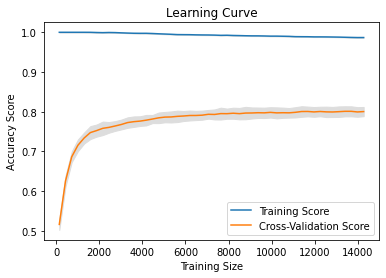

In [ ]:
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [ ]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.8007566204287516


In [ ]:
print(f1_score(y_test, predictions_SVM, average="macro"))

0.8006674780170324


In [ ]:
print(precision_score(y_test, predictions_SVM, average="macro"))

0.8017100431353864


In [ ]:
print(recall_score(y_test, predictions_SVM, average="macro")) 

0.8000819689305436
